In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.metrics import r2_score,mean_squared_error
from math import sqrt
from sklearn.model_selection import GridSearchCV,train_test_split


In [3]:
df=pd.read_csv('Advertising.csv')
df.head()

,Unnamed: 0,TV,radio,newspaper,sales
0,1,230.1,37.8,69.2,22.1
1,2,44.5,39.3,45.1,10.4
2,3,17.2,45.9,69.3,9.3
3,4,151.5,41.3,58.5,18.5
4,5,180.8,10.8,58.4,12.9


In [4]:
df.info


<bound method DataFrame.info of      Unnamed: 0     TV  radio  newspaper  sales
0             1  230.1   37.8       69.2   22.1
1             2   44.5   39.3       45.1   10.4
2             3   17.2   45.9       69.3    9.3
3             4  151.5   41.3       58.5   18.5
4             5  180.8   10.8       58.4   12.9
..          ...    ...    ...        ...    ...
195         196   38.2    3.7       13.8    7.6
196         197   94.2    4.9        8.1    9.7
197         198  177.0    9.3        6.4   12.8
198         199  283.6   42.0       66.2   25.5
199         200  232.1    8.6        8.7   13.4

[200 rows x 5 columns]>

In [5]:
df.describe()

,Unnamed: 0,TV,radio,newspaper,sales
count,200.000000,200.000000,200.000000,200.000000,200.000000
mean,100.500000,147.042500,23.264000,30.554000,14.022500
std,57.879185,85.854236,14.846809,21.778621,5.217457
min,1.000000,0.700000,0.000000,0.300000,1.600000
25%,50.750000,74.375000,9.975000,12.750000,10.375000
50%,100.500000,149.750000,22.900000,25.750000,12.900000
75%,150.250000,218.825000,36.525000,45.100000,17.400000
max,200.000000,296.400000,49.600000,114.000000,27.000000


In [6]:
df.columns


Index(['Unnamed: 0', 'TV', 'radio', 'newspaper', 'sales'], dtype='object')

In [7]:

df.head()

,Unnamed: 0,TV,radio,newspaper,sales
0,1,230.1,37.8,69.2,22.1
1,2,44.5,39.3,45.1,10.4
2,3,17.2,45.9,69.3,9.3
3,4,151.5,41.3,58.5,18.5
4,5,180.8,10.8,58.4,12.9


In [8]:
df.describe().transpose()

,count,mean,std,min,25%,50%,75%,max
Unnamed: 0,200.0,100.5000,57.879185,1.0,50.750,100.50,150.250,200.0
TV,200.0,147.0425,85.854236,0.7,74.375,149.75,218.825,296.4
radio,200.0,23.2640,14.846809,0.0,9.975,22.90,36.525,49.6
newspaper,200.0,30.5540,21.778621,0.3,12.750,25.75,45.100,114.0
sales,200.0,14.0225,5.217457,1.6,10.375,12.90,17.400,27.0


In [9]:
df.describe()


,Unnamed: 0,TV,radio,newspaper,sales
count,200.000000,200.000000,200.000000,200.000000,200.000000
mean,100.500000,147.042500,23.264000,30.554000,14.022500
std,57.879185,85.854236,14.846809,21.778621,5.217457
min,1.000000,0.700000,0.000000,0.300000,1.600000
25%,50.750000,74.375000,9.975000,12.750000,10.375000
50%,100.500000,149.750000,22.900000,25.750000,12.900000
75%,150.250000,218.825000,36.525000,45.100000,17.400000
max,200.000000,296.400000,49.600000,114.000000,27.000000


In [10]:
df.shape

(200, 5)

In [11]:
df.TV.skew(),df.radio.skew(),df.newspaper.skew(),df.sales.skew()

(-0.06985336213274573,
 0.09417463149664404,
 0.8947204074986175,
 0.4075714250767127)

In [12]:
df.TV.kurtosis(),df.TV.skew()

(-1.2264948242299691, -0.06985336213274573)

C:\Users\SM2063\AppData\Local\anaconda3\Lib\site-packages\seaborn\axisgrid.py:118: UserWarning: The figure layout has changed to tight
  self._figure.tight_layout(*args, **kwargs)


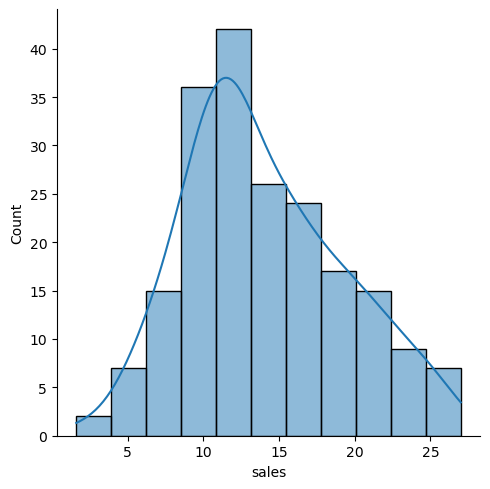

In [13]:
import seaborn as sns
sns.displot(df['sales'],kde=True)

C:\Users\SM2063\AppData\Local\anaconda3\Lib\site-packages\seaborn\axisgrid.py:118: UserWarning: The figure layout has changed to tight
  self._figure.tight_layout(*args, **kwargs)


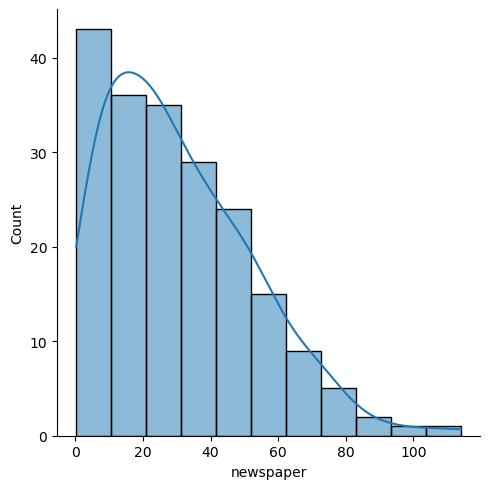

In [14]:
import seaborn as sns
sns.displot(df['newspaper'],kde=True)

<Axes: xlabel='newspaper', ylabel='sales'>

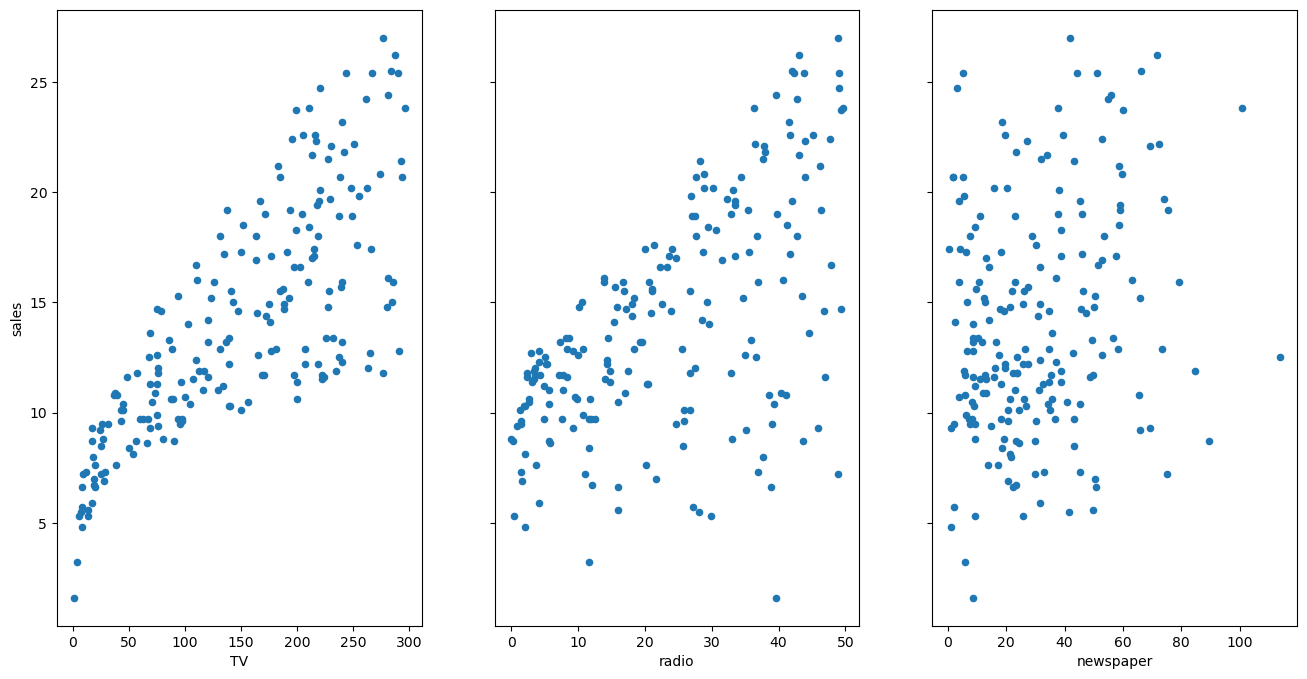

In [15]:
import matplotlib.pyplot as plt
fig,axs=plt.subplots(1,3,sharey=True)
df.plot(kind='scatter',x='TV',y='sales',ax=axs[0],figsize=(16,8))
df.plot(kind='scatter',x='radio',y='sales',ax=axs[1])
df.plot(kind='scatter',x='newspaper',y='sales',ax=axs[2])


In [16]:
df.corr()

,Unnamed: 0,TV,radio,newspaper,sales
Unnamed: 0,1.000000,0.017715,-0.110680,-0.154944,-0.051616
TV,0.017715,1.000000,0.054809,0.056648,0.782224
radio,-0.110680,0.054809,1.000000,0.354104,0.576223
newspaper,-0.154944,0.056648,0.354104,1.000000,0.228299
sales,-0.051616,0.782224,0.576223,0.228299,1.000000


In [17]:
X=df[['TV']]
Y=df['sales']

In [18]:
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error,mean_absolute_error,mean_absolute_percentage_error
from math import sqrt

In [19]:
lr_model=LinearRegression()
lr_model.fit(X,Y)

LinearRegression()

In [20]:
lr_model.intercept_,lr_model.coef_

(7.032593549127693, array([0.04753664]))

In [21]:
y_pred=lr_model.predict(X)

In [22]:
y_pred[0:10]

array([17.97077451,  9.14797405,  7.85022376, 14.23439457, 15.62721814,
        7.44616232,  9.76595037, 12.74649773,  7.44140866, 16.53041431])

In [23]:
Y[0:10]

0    22.1
1    10.4
2     9.3
3    18.5
4    12.9
5     7.2
6    11.8
7    13.2
8     4.8
9    10.6
Name: sales, dtype: float64

In [24]:
print("mean_Absolute_error - MAE (difference btw actual and predicted output)",mean_absolute_error(Y,y_pred))

mean_Absolute_error - MAE (difference btw actual and predicted output) 2.549806038927486


In [25]:
print("mean_squredAbsolute_error - MSAE (difference btw actual and predicted output)",sqrt(mean_absolute_error(Y,y_pred)))

mean_squredAbsolute_error - MSAE (difference btw actual and predicted output) 1.5968112095446618


In [26]:
print("mean_percentageAbsolute_error - MpAE (difference btw actual and predicted output)",mean_absolute_percentage_error(Y,y_pred)*100)

mean_percentageAbsolute_error - MpAE (difference btw actual and predicted output) 20.57659543920778


In [27]:
x_new=pd.DataFrame({'TV':[50]})
x_new

,TV
0,50


In [28]:
y_new=lr_model.predict(x_new)
y_new

array([9.40942557])

In [29]:
x_new=pd.DataFrame({'TV':[df.TV.min(),df.TV.max()]})
x_new.head()

,TV
0,0.7
1,296.4


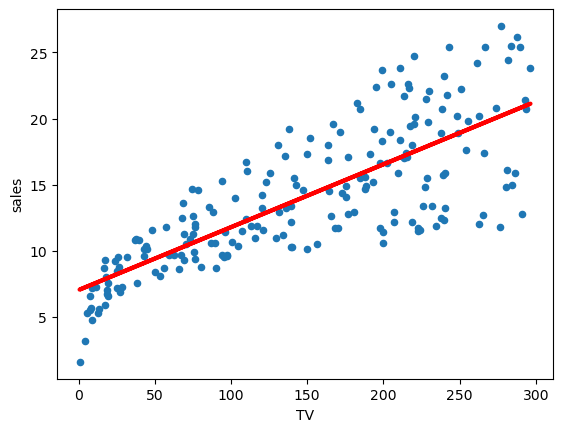

In [30]:
df.plot(kind='scatter',x='TV',y='sales')
plt.plot(np.array(X),np.array(y_pred),c='red',linewidth=3)

In [31]:
xe=df[['TV','radio','newspaper']]
ye=df['sales']

In [32]:
X_train, X_test , y_train, y_test=train_test_split(xe,ye,test_size=0.2)
X_train

,TV,radio,newspaper
46,89.7,9.9,35.7
154,187.8,21.1,9.5
113,209.6,20.6,10.7
5,8.7,48.9,75.0
75,16.9,43.7,89.4
...,...,...,...
163,163.5,36.8,7.4
16,67.8,36.6,114.0
89,109.8,47.8,51.4
45,175.1,22.5,31.5


In [33]:
X_test

,TV,radio,newspaper
47,239.9,41.5,18.5
194,149.7,35.6,6.0
93,250.9,36.5,72.3
23,228.3,16.9,26.2
87,110.7,40.6,63.2
109,255.4,26.9,5.5
85,193.2,18.4,65.7
199,232.1,8.6,8.7
110,225.8,8.2,56.5
165,234.5,3.4,84.8


In [34]:
y_test

47     23.2
194    17.3
93     22.2
23     15.5
87     16.0
109    19.8
85     15.2
199    13.4
110    13.4
165    11.9
31     11.9
180    10.5
168    17.1
17     24.4
59     18.4
92     19.4
192     5.9
1      10.4
61     24.2
54     20.2
80     11.8
107     8.7
29     10.5
36     25.4
169    15.0
155     3.2
91      7.3
81     12.3
67     13.4
11     17.4
28     18.9
53     21.2
101    23.8
19     14.6
127     8.8
167    12.2
128    24.7
2       9.3
95     16.9
108     5.3
Name: sales, dtype: float64

In [35]:
len(y_test)

40

In [36]:
len(y_train)

160

In [37]:
len(X_train)

160

In [38]:
len(X_test)

40

In [39]:
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error,mean_absolute_error,mean_absolute_percentage_error
from math import sqrt
lr_modell=LinearRegression()


In [40]:
lr_modell.fit(X_train, y_train)

LinearRegression()

In [41]:
lr_modell.intercept_, lr_modell.coef_

(2.8793019536490654, array([0.04606271, 0.18225678, 0.00307987]))

In [42]:
y_test_pred=lr_modell.predict(X_test)
y_test_pred

array([21.55037976, 16.28171011, 21.31148241, 16.55625041, 15.57271674,
       19.56336442, 15.33448923, 15.16465973, 14.94877955, 14.56185275,
       11.3699326 , 10.5921526 , 17.27986972, 23.23057326, 17.98993249,
       19.19446792,  4.51615712, 12.23068606, 22.866321  , 20.27794069,
       11.33343003,  7.16950071,  9.17309624, 23.1716853 , 17.92656298,
        5.19989299,  4.57171616, 14.78603928, 11.96997523, 17.15544772,
       19.34939157, 19.89140407, 23.45896845, 14.07910148,  6.60186593,
       13.41255471, 21.96735461, 12.25060166, 16.32358152,  3.63447071])

In [43]:
print("mean_Absolute_error - MAE (difference btw actual and predicted output)",mean_absolute_error(y_test,y_test_pred))

mean_Absolute_error - MAE (difference btw actual and predicted output) 1.2480771984030041


In [44]:
y_train_pred=lr_modell.predict(X_train)
y_train_pred

array([ 8.92542027, 15.40475546, 16.32148994, 12.42339422, 11.89772322,
        8.20664058,  8.85283349, 15.29144625, 16.84845388, 12.38405994,
       16.11703677, 13.03061379,  7.7553888 , 18.22843417, 19.88795487,
       18.15237522, 12.40584883, 10.28272093,  8.3438889 , 14.25006134,
        8.23008096, 21.22945175, 15.6871441 , 20.58076431, 20.93775429,
       18.75961693, 12.24918911, 16.37809179, 17.23294705, 15.29622758,
       21.66198643, 12.70349886, 14.02194175, 14.01257868, 20.56934264,
        9.97507988,  8.82056987,  4.50139051,  9.1263687 , 16.96870879,
       13.66791076, 21.45736981, 14.21851882, 17.04316294,  9.26475052,
       10.48422121,  9.64358638, 20.35123594, 10.62320464, 10.12774169,
        6.53797393,  7.56545365,  8.13641423, 18.41862276,  7.944463  ,
       18.45642852,  5.35574966, 17.69277548,  9.71590661, 16.27161029,
       17.05317545, 24.18511297, 18.59800134, 21.74536832, 19.40260534,
        5.77407955, 10.64089109,  7.3532856 , 20.11917007, 11.45

In [45]:
print("mean_Absolute_error - MAE (difference btw actual and predicted output)",mean_absolute_error(y_train,y_train_pred))

mean_Absolute_error - MAE (difference btw actual and predicted output) 1.2777074494562513


In [46]:
print("mean_Absolute_error - MAE (difference btw actual and predicted output)",sqrt(mean_absolute_error(y_train,y_train_pred)))

mean_Absolute_error - MAE (difference btw actual and predicted output) 1.1303572220569262


In [47]:
from statsmodels.formula.api import ols


In [48]:
ol=ols(formula ='sales ~ TV', data=df).fit()
train_pred =ol.predict(X_train)
test_pred=ol.predict(X_test)
train_pred
test_pred

47     18.436634
194    14.148829
93     18.959537
23     17.885209
87     12.294900
109    19.173452
85     16.216672
199    18.065848
110    17.766367
165    18.179936
31     12.399480
180    14.476831
168    17.271986
17     20.409404
59     17.048564
92     17.381320
192     7.850224
1       9.147974
61     19.453918
54     19.520469
80     10.664393
107    11.329906
29     10.388680
36     19.720123
169    20.547260
155     7.227494
91      8.392141
81     18.431880
67     13.654448
11     17.238710
28     18.859710
53     15.712784
101    21.122454
19     14.034741
127    10.845032
167    16.863171
128    17.504915
2       7.850224
95     14.795327
108     7.655324
dtype: float64

In [49]:
print("MSE on train:", mean_squared_error(y_train, train_pred))
print("MSE on test:", mean_squared_error(y_test, test_pred))

print("RMSE on train:", sqrt(mean_squared_error(y_train, train_pred)))
print("RMSE on test:", sqrt(mean_squared_error(y_test, test_pred)))

print("MAE on train:", mean_absolute_error(y_train, train_pred))
print("MAE on test:", mean_absolute_error(y_test, test_pred))

print("MAPE on train:", mean_absolute_percentage_error(y_train, train_pred))
print("MAPE on test:", mean_absolute_percentage_error(y_test, test_pred))

MSE on train: 10.239278687609747
MSE on test: 11.606149827844785
RMSE on train: 3.199887292954198
RMSE on test: 3.4067799793712514
MAE on train: 2.498556618611386
MAE on test: 2.7548037201918865
MAPE on train: 0.20313130682438482
MAPE on test: 0.21630454466284985


In [50]:
print("r2_score",ol.rsquared)
print("adjectedr2_Score",ol.rsquared_adj)

r2_score 0.611875050850071
adjectedr2_Score 0.6099148238341623


In [51]:
a=df[['TV','radio','newspaper']]
b=df['sales']

In [52]:
from statsmodels.formula.api import ols
om=ols(formula='sales ~ TV + radio + newspaper', data=df).fit()
a_train,a_test,b_train,b_test=train_test_split(a,b,test_size=0.2,random_state=100)

y_pred_te=om.predict(a_test)
y_pred_tr=om.predict(a_train)
y_pred

array([17.97077451,  9.14797405,  7.85022376, 14.23439457, 15.62721814,
        7.44616232,  9.76595037, 12.74649773,  7.44140866, 16.53041431,
       10.17476548, 17.23871025,  8.16396559, 11.66741599, 16.73482186,
       16.32125309, 10.25557777, 20.40940417, 10.32212907, 14.03474068,
       17.41459582, 18.31779199,  7.6600772 , 17.88520856,  9.99412625,
       19.52997632, 13.82557947, 18.44614092, 18.85970969, 10.38868036,
       20.95607553, 12.39948025, 11.653155  , 19.65832525, 11.58185004,
       20.85149492, 19.72012288, 10.58358059,  9.08142275, 17.87094757,
       16.65876324, 15.44657891, 20.98935118, 16.86792445,  8.22576322,
       15.35625929, 11.2966302 , 18.43663359, 17.83291826, 10.21279479,
       16.53041431, 11.80527225, 17.31952254, 15.71278409, 19.52046899,
       16.48763133,  7.37961102, 13.50708398, 17.05331735, 17.04856369,
        9.57580381, 19.45391769, 18.4081116 , 11.91460652, 13.26464711,
       10.31262174,  8.52999772, 13.65444756, 18.31779199, 17.33

In [53]:
from sklearn.metrics import mean_squared_error,mean_absolute_error,mean_absolute_percentage_error
from math import sqrt
print("mean absolute error",mean_absolute_error(b_test,y_pred_te))
print("mean absolute error",mean_absolute_error(b_train,y_pred_tr))

print("mean square absolute error",sqrt(mean_absolute_error(b_test,y_pred_te)))
print("mean square absolute error",sqrt(mean_absolute_error(b_train,y_pred_tr)))


print("mean squared error",mean_squared_error(b_test,y_pred_te))
print("mean squared error",mean_squared_error(b_train,y_pred_tr))

print("rsquared", om.rsquared)

print("adjustent", om.rsquared_adj)

mean absolute error 0.9443825445110914
mean absolute error 1.3289184009810628
mean square absolute error 0.9717934680327356
mean square absolute error 1.152787231444321
mean squared error 1.5770482375431436
mean squared error 3.085895833752885
rsquared 0.8972106381789522
adjustent 0.8956373316204668
